# Using Deepchem Datasets
In this tutorial we will have a look at various deepchem `dataset` methods present in `deepchem.datasets`.

In [1]:
import deepchem as dc
import numpy as np
import random


/home/skand/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Using NumpyDatasets 
This is used when you have your data in numpy arrays.

In [5]:
# data is your dataset in numpy array of size : 20x20.
data = np.random.random((4, 4))
labels = np.random.random((4,)) # labels of size 20x1


In [6]:
from deepchem.data.datasets import NumpyDataset # import NumpyDataset

In [7]:
dataset = NumpyDataset(data, labels) # creates numpy dataset object

## Extracting X, y from NumpyDataset Object
Extracting the data and labels from the NumpyDataset is very easy. 

In [8]:
dataset.X # Extracts the data (X) from the NumpyDataset Object


array([[0.85221987, 0.47412003, 0.71233837, 0.59094892],
       [0.39387594, 0.99322661, 0.75225026, 0.00995347],
       [0.24524296, 0.96471994, 0.41466874, 0.99579889],
       [0.01912096, 0.99213349, 0.61235698, 0.06214374]])

In [9]:
dataset.y # Extracts the labels (y) from the NumpyDataset Object

array([[0.75443686],
       [0.78473712],
       [0.6223576 ],
       [0.53884944]])

## Weights of a dataset - w
So apart from `X` and `y` which are the data and the labels, you can also assign weights `w` to each data instance. The dimension of `w` is same as that of `y`(which is Nx1 where N is the number of data instances).

**NOTE:** By default `w` is a vector initialized with equal weights (all being 1). 

In [10]:
dataset.w # printing the weights that are assigned by default. Notice that they are a vector of 1's

array([[1.],
       [1.],
       [1.],
       [1.]])

In [11]:
w = np.random.random((4,)) # initializing weights with random vector of size 20x1
dataset_with_weights = NumpyDataset(data, labels, w) # creates numpy dataset object

In [12]:
dataset_with_weights.w

array([[0.8369533 ],
       [0.52828242],
       [0.43185016],
       [0.99442685]])

## Iterating over NumpyDataset
In order to iterate over NumpyDataset, we use `itersamples` method. We iterate over 4 quantities, namely `X`, `y`, `w` and `ids`. The first three quantities are the same as discussed above and `ids` is the id of the data instance. By default the id is given in order starting from `1`

In [47]:
for x, y, w, id in dataset.itersamples():
    print(x, y, w, id)

(array([0.85221987, 0.47412003, 0.71233837, 0.59094892]), array([0.75443686]), array([1.]), 0)
(array([0.39387594, 0.99322661, 0.75225026, 0.00995347]), array([0.78473712]), array([1.]), 1)
(array([0.24524296, 0.96471994, 0.41466874, 0.99579889]), array([0.6223576]), array([1.]), 2)
(array([0.01912096, 0.99213349, 0.61235698, 0.06214374]), array([0.53884944]), array([1.]), 3)


You can also extract the ids by `dataset.ids`. This would return a numpy array consisting of the ids of the data instances.

In [49]:
dataset.ids

array([0, 1, 2, 3], dtype=object)

## MNIST Example
Just to get a better understanding, lets take read MNIST data and use `NumpyDataset` to store the data. 

In [22]:
from tensorflow.examples.tutorials.mnist import input_data

In [23]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [42]:
# Load the numpy data of MNIST into NumpyDataset
train = NumpyDataset(mnist.train.images, mnist.train.labels)
valid = NumpyDataset(mnist.validation.images, mnist.validation.labels)


In [37]:
import matplotlib.pyplot as plt

/home/skand/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


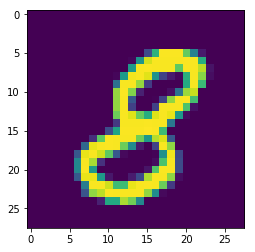

In [44]:
# Visualize one sample 
sample = np.reshape(train.X[5], (28, 28))
plt.imshow(sample)
plt.show()

In [46]:
train.ids

array([0, 1, 2, ..., 54997, 54998, 54999], dtype=object)